# INTRODUCTION

# TRAFFIC SIGN RECOGNITION CNN

Here we will implement in python using tensorflow a convolutional neural network created for traffic sign recognition.

We will recreate a CNN using the architecture and dataset described in this paper https://link.springer.com/article/10.1007/s11042-022-12531-w

We will use only GTSRB dataset which is a German Traffic Sign dataset used to train, validate and test out CNN.

Noew we import the dataset into the python code

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt

/home/colucci/Tesi/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/colucci/Tesi/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/colucci/Tesi/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/colucci/Tesi/tf1/lib/python3.6/site-packages/tensorflow/python/framework/dty

Use Tensorflow GPU

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14237272757596755049]

now we read train and validation images and their labels from GTSRB dataset as done in this notebook
https://github.com/sonu275981/GTSRB---German-Traffic-Sign-Recognition/blob/main/GTSRB%20-%20German%20Traffic%20Sign%20Recognition%20Benchmark.ipynb

In this dataset there are 43 classes of traffic signs. In the "train" folder we have folder numerated from 0 to 42. In the folder d there are all images of signs associated to label d.

Dataset took from https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?resource=download

First, create a function to import the dataset

In [3]:
from PIL import Image
import os
import numpy as np

def load_dataset(path):
    data = []
    labels = []
    classes = 43
    
    
    
    #Retrieving the images and their labels
    for i in range(classes):
        pt = os.path.join(path,str(i))
        images = os.listdir(pt)
    
        for a in images:
            try:
                image = Image.open(pt + '/'+ a)
                image = image.resize((32,32))
                image = np.array(image)
    
                #data.append(image)
                #labels.append(i)
                data.append([image,i]) #appending all value together
            except:
                print("Error loading image")
    return data

In [4]:
data=load_dataset("./Dataset")

All images are resized in order to be a 32x32px images

now we create the dataset of images

In [5]:
X=[]
y=[]

for features,target in data:
  X.append(features)
  y.append(target)

Divide the dataset into validation and train dataset, respectivel 70% train as said into the paper

In [6]:
from sklearn.model_selection import train_test_split
#Converting lists into numpy arrays
X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape,y_train.shape)

(27446, 32, 32, 3) (27446,)


So we have 39209 images all of them are tensors 30x30x3 so with 3 channels (representing red, green and blue).

We use 27446 of them as training set.

Let's now scale features in order to have values not between 0 and 255 in tensors but between 0 and 1.

In [7]:
X_train=X_train/255.0
X_val=X_val/255.0

Let's not create our convolutional neural network as expressend in the paper

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu",input_shape=(28, 28, 32)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu",input_shape=(13, 13, 32)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu",input_shape=(13, 13, 64)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  #converts tensor into 1d vector
    tf.keras.layers.Dense(units=43,activation=tf.keras.activations.softmax)
])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

Now let's train the model as done in the paper, by using a cross-entropy loss and Adam optimizer (with learning rate of 0.001) as algorithm to minimize the loss and a batch size of 128.

We use 5 epochs to train our NN and use the training dataset for train and for each epoch, track the performance on the validation dataset (using accuracy, precision and recall as metrics) in order to see how well the model performs on unseen data

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [10]:
history=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_val,y_val))

Train on 27446 samples, validate on 11763 samples
Epoch 1/10
27446/27446 [==============================]27446/27446 [==============================] - 21s 749us/step - loss: 1.5969 - acc: 0.5690 - val_loss: 0.3297 - val_acc: 0.9119

Epoch 2/10
27446/27446 [==============================]27446/27446 [==============================] - 20s 731us/step - loss: 0.2613 - acc: 0.9263 - val_loss: 0.1193 - val_acc: 0.9711

Epoch 3/10
27446/27446 [==============================]27446/27446 [==============================] - 20s 716us/step - loss: 0.1291 - acc: 0.9637 - val_loss: 0.0725 - val_acc: 0.9829

Epoch 4/10
27446/27446 [==============================]27446/27446 [==============================] - 20s 716us/step - loss: 0.0780 - acc: 0.9775 - val_loss: 0.0448 - val_acc: 0.9896

Epoch 5/10
27446/27446 [==============================]27446/27446 [==============================] - 19s 709us/step - loss: 0.0587 - acc: 0.9839 - val_loss: 0.0376 - val_acc: 0.9901

Epoch 6/10
27446/27446 [======

Trained our model we wil save it on a file

In [11]:
model.save_weights("Model.weights_zoo.h5")

In [106]:
model.load_weights("Model.weights_zoo.h5")

# Model's Performance

Once trained the neural network we print what the model output looks like

In [11]:
sample = X_val[0].reshape((1,32,32,3))
output=model.predict(sample)

print("NN output:",output)
print("Real label associated to the sample:",y_val[0])

NN output: [[3.2535488e-09 9.2311922e-11 2.1966640e-08 5.5536728e-14 3.2813823e-05
  6.1875161e-10 1.1985805e-18 1.6393782e-14 8.6052836e-08 1.3134155e-06
  3.0988534e-10 3.5597734e-09 1.7069027e-14 1.2488455e-12 1.2302780e-14
  3.1822174e-07 2.4892423e-11 9.0165376e-16 3.4888578e-07 1.4202342e-06
  2.8985127e-08 3.5715087e-07 2.4893967e-09 4.9101168e-11 6.3820489e-06
  4.4792842e-10 9.9995661e-01 2.3928914e-10 1.4132603e-09 1.5216507e-07
  9.2167214e-13 9.2814591e-14 3.7410901e-14 9.7441129e-15 5.4902750e-23
  7.5574685e-14 6.7361812e-13 1.1494199e-16 7.7419478e-13 9.0291739e-15
  6.4540401e-08 1.6789403e-14 5.3735891e-19]]
Real label associated to the sample: 26


So the NN since implement a softmax output layer, output a vector of 43 elements in which the $j$-the element represent the probability that $x$ is classified as label $j$.

So now we implement a function that given this vector, returns the heighest probability and the label class with the highest probability.


In [57]:
def out_label(prob_vector):
  max_proba=max(prob_vector)
  predicted_label,=np.where(prob_vector==max_proba)
  return max_proba, predicted_label[0]

Now let's see if the previous prediction was correct

In [12]:
highest_proba, predicted_label=out_label(output[0])
print("NN output label:",predicted_label,"with a probability of:",highest_proba)
print("Real label associated to the sample:",y_val[0])

NN output label: 26 with a probability of: 0.9995208
Real label associated to the sample: 26


Good, the NN works. Let's now test it on the validation dataset and see the performance of the network in terms of:<br>
- Accuracy<br>
$\frac{TP+TN}{TP+FP+TN+FN}$
- Precision<br>
$\frac{TP}{TP+FP}$<br>
Precision for class $j$ represent the probability that a sample classified as $j$ is effectively labeled as $j$.
- Recall<br>
$\frac{TP}{TP+FN}$<br>
Recall for class $j$ represent the probability that the model correctly classify as $j$ a sample labeled with $j$.

In [140]:
def evaluate_model(model, X_test, y_test):
    predicted_labels=[]

    output=model.predict(X_test)

    for o in output:
        highest_proba, predicted_l=out_label(o)
        predicted_labels.append([predicted_l])

    predicted_labels=np.array(predicted_labels)
    y_test=np.array([[y] for y in y_test])

    #now we got the vector of predicted labels for each of the samples in the validation dataset
    #calculate the accuracy
    accuracy=(y_test == predicted_labels).sum() / X_test.shape[0]

    #let's now calculate precision and recall which refers to single classes
    precisions=[]
    recalls=[]

    for label in range(43):
        y_true=np.where(y_test==[label],1,0)
        y_pred=np.where(predicted_labels==[label],1,0)

        TP = np.count_nonzero(y_pred * y_true)
        TN = np.count_nonzero((y_pred - 1) * (y_true - 1))
        FP = np.count_nonzero(y_pred * (y_true - 1))
        FN = np.count_nonzero((y_pred - 1) * y_true)

        #calculate precision
        precision_metric= TP / (TP + FP)
        precisions.append(precision_metric)

        #calculate recall
        recall_metric= TP / (TP + FN)
        recalls.append(recall_metric)

    return accuracy,np.array(precisions),np.array(recalls)

In [145]:
acc,precisions,recalls=evaluate_model(model,X_val,y_val)

In [146]:
print("Models metrics on validation set are:")
print("Accuracy:",acc)
print("Average precision:",np.average(precisions))
print("Average recall:",np.average(recalls))
print("\n")
print('| {:^10} | {:^10} | {:^10} |'.format(*["Class","Precision","Recall"]))
for p in range(43):
  r=recalls[p]
  pr=precisions[p]
  print('| {:^10} | {:^10.2f} | {:^10.2f} |'.format(*[p,pr,r]))

Models metrics on validation set are:
Accuracy: 0.9923488905891354
Average precision: 0.9931323982836833
Average recall: 0.989496958372078


|   Class    | Precision  |   Recall   |
|     0      |    1.00    |    0.89    |
|     1      |    0.98    |    1.00    |
|     2      |    1.00    |    0.98    |
|     3      |    1.00    |    0.99    |
|     4      |    0.99    |    1.00    |
|     5      |    0.99    |    0.98    |
|     6      |    1.00    |    0.99    |
|     7      |    0.98    |    1.00    |
|     8      |    0.99    |    0.98    |
|     9      |    0.99    |    1.00    |
|     10     |    1.00    |    1.00    |
|     11     |    0.99    |    0.99    |
|     12     |    1.00    |    1.00    |
|     13     |    1.00    |    1.00    |
|     14     |    1.00    |    1.00    |
|     15     |    0.99    |    1.00    |
|     16     |    1.00    |    1.00    |
|     17     |    1.00    |    0.99    |
|     18     |    0.98    |    1.00    |
|     19     |    0.98    |    0.96    

Let's now plot the accuracy and the loss on train and validaton dataset uring each epoch in the training process.

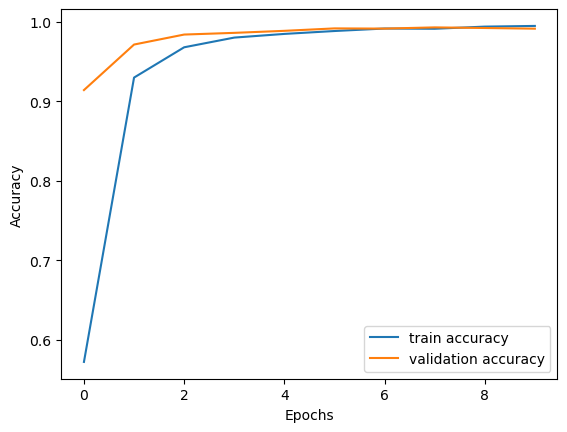

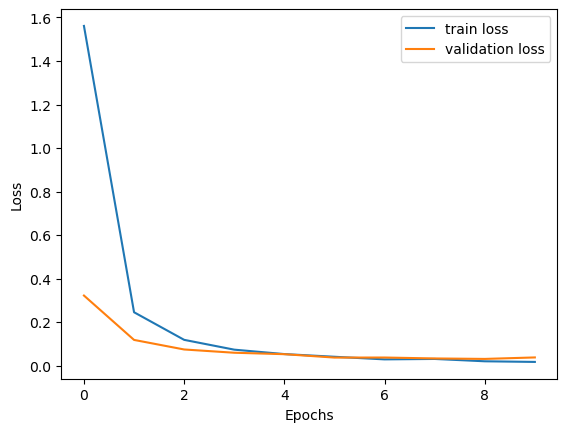

In [17]:
plt.plot(range(10), history.history["accuracy"], label="train accuracy")
plt.plot(range(10), history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.plot(range(10), history.history["loss"], label="train loss")
plt.plot(range(10), history.history["val_loss"], label="validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# IMPLEMENT EVASION BLACKBOX ATTACK (ZEROTH-ORDER OPTIMIZATION)

The evasion attack that we are going to implement on the model is calld zeroth-order optimization attack, a black-box evasion targeted attack that plans to generate adversarial examples.

Our sperimentation focus on stop signs, which has class number 14 on the GTSRB dataset.

Our goal is to create adversarial examples for stop signs (class 14) in order to let the model classify them as 50 speed limit signs (class 2).

In order to do this we can take an example $x$ of stop sign from which start creating our first adversarial example $x'$ by using zeroth-order optimization.

This attack plans to find the adversarial example $x'$ such that solves this minimization problem:<br>
$\min_{x'} ||x-x'||_2^2+λ*f(x',t)$<br>
With $x$ the example on which we are basing, $λ$ a regularization parameter, $t$ the target class that in our case is class 2 (50 speed limit signs) and $f(x',t)$ which is a function that represent the probability of attack's failure.

The function $||x'-x||_2^2$ represent the distance between the example $x$ and the adversarial exmaple $x'$.

So by solving the minimization problem we find an adversarial example such that the difference between it and $x$ is minimum and the probability of unsuccess of the attack is also minimum.

The function $f$ is defined as follows:<br>
$f(x',t)=\max \{\max_{i\neq t} \log(a_i^{(x')}) -\log(a_t^{(x')}),-k\}$<br>
With $a_j^{(x')}$ the probability that example $x'$ is classified as $y=j$ and so $a_j^{(x')}=P(y=j|x')$.<br>
The term $k$ is another constant that ensures a constant gap between $\max_{i\neq t} \log(a_i^{(x')})$ and $\log(a_t^{(x')})$.

The evasion attack success if the model misclassify an adversarial example as 50 speed limit sign.
<br><br>
In order to solve this optimization problem we use gradient optimization algorthim which plans to compute derivatives of the objective function in order to update parameter $x$ until its value become closer enought to the minimum $x'$.

Since we do not know the explicit formula of $a_j^{(x)}$, since it's an internal information to the NN and being in a black-box attack we do not have access to it, we are going to approximate the value of the derivative of $f$ by using the simmetric diference quotient as follows:<br>
$\hat{g_i}:=\frac{∂f}{∂x_i}(x)≈\frac{f(x+he_i)-f(x-he_i)}{2h}$<br>
With $h$ a small constat value, and $e_i$ the basis vector that has all zeros and only 1 at $i$-th position.

Let's start implementing some functions that we need in order to perform this attack.

Find an example to generate the adversarial example.

As example we will take the image classified as a stop sign with the lowest probability among all images classified as stop signs

In [58]:
def find_lowest_class_probabile_images(X,y,model,label,n):
  '''
  Find first n images classified as label "label" with the lowest probabilty
  
  returns the vector of the first n images and relative probabilities, classified as "label" with the lowest probabilty
  (ex. [{"proba":0.97,"image":...},...])
  '''
  model_predictions_label=[]

  #calculate probabilities for all images
  probs=model.predict(X)

  #for all preditions
  for i in range(probs.shape[0]):
    #get ouput label
    highest_proba, predicted_label=out_label(probs[i])

    #if the output label is "label"
    if predicted_label==label:
      #store the image and predicted probability of its
      model_predictions_label.append({"proba":highest_proba,"image":X[i]})
  
  #order the array of images classified as stop signs from the lowest probability to the hightest
  ordered_predictions=sorted(model_predictions_label, key=lambda d: d['proba'])

  #return first n elements of this array
  return ordered_predictions[:n]

Image probability: 0.61502206


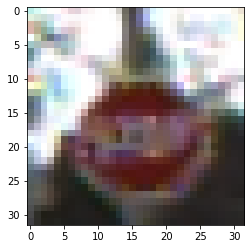

In [59]:
#get first 20 images classified as stop signs with the lowest probability among validation dataset
lowest_prob_images_stop_sign=find_lowest_class_probabile_images(X_val,y_val,model,14,500)

#print the image classified as stop sign with the lowest probability
print("Image probability:",lowest_prob_images_stop_sign[0]["proba"])
plt.imshow(lowest_prob_images_stop_sign[0]["image"])
plt.show()

That's the image of a stop sign that is classified as a stop sign with the lowest probability.

We will use this image as beginner sample in order to create our adversarial example using zeroth-order optimization attack.

# ZOO ATTACK UNTARGETED

Install library for adverarial attacks

In [60]:
import Autozoomattack.Utils as util
from Autozoomattack.blackbox_attack import ZOO
from numpy import linalg as LA

In [61]:
class Modello:
    def __init__(self, model):
        self.num_channels = 3
        self.image_size = 32
        self.num_labels = 43

        self.model=model


    def predict(self, data):
        return self.model(data)

In [75]:
#take images classified as stop sign with the lowest probability
lowest_prob_images_stop_sign_imgs=[i["image"] for i in lowest_prob_images_stop_sign][:100]

#list which contains all adv examples
advs=[]

with tf.Session() as sess:
    #initialize variables (prevent FailedPreconditionError error)
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    
    model.load_weights("Model.weights_zoo.h5")
    
    mod=Modello(model)

    args={"batch_size":128,"img_resize":32,"max_iterations":2000,"print_every":1000,"switch_iterations":100,
         "init_const":0.001,"attack_type":"untargeted","use_tanh":False,"lr":5e-4,"confidence":0.0}
    
    blackbox_attack = ZOO(sess,mod,args)

    labelss=np.zeros(43)
    labelss[14]=1  #one-hot encoded label
    
    
    #cicle through all examples
    for i in lowest_prob_images_stop_sign_imgs:
        adv = blackbox_attack.attack(i,labelss)
                
        advs.append(adv)
        
    
    advs=np.array(advs, dtype=float)

[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:197.89, real:0.91455, other:0.029269, loss1:0.0034419, loss2:197.8865967
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
##### Reset ADAM #####
[STATS][FirstAttack] iter:711, const:10000.0, cost:182272, time:24630.295, size:(1, 32, 32, 3), loss:197.98, loss1:0, loss2:197.98, l2:197.98
iter:800 old constant:10000.0
iter:800 new constant:5000.0
iter:900 old constant:5000.0
iter:900 new constant:2500.0
[Info][Iter] iter:1000, const:2500.0, cost:256000, time:48556.750, size:(1, 32, 32, 3), loss:197.98, real:0.42742, other:0.43275, loss1:0, loss2:197.977478
iter:1000 old constant:25

KeyboardInterrupt: 

In [11]:
def show_images_adv_pred(imgs,x,y,save,file_name):
    # create figure 
    fig = plt.figure(figsize=(x, y)) 
    fig.patch.set_facecolor('xkcd:white')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.1, 
                    top=1.7, 
                    wspace=0.4, 
                    hspace=0.4)

    # setting values to rows and column variables 
    rows = int(np.sqrt(imgs.shape[0]))+1
    columns = int(np.sqrt(imgs.shape[0]))+1
    
    for i in range(1,imgs.shape[0]+1):
        # Adds a subplot at the ith position 
        fig.add_subplot(rows, columns, i) 

        # showing image 
        plt.imshow(imgs[i-1]["image"].reshape((32,32,3))) 
        plt.axis('off') 
        plt.title(str(imgs[i-1]["real_label"])+"→"+str(imgs[i-1]["predicted_label"])+
                  "\n Label "+str(imgs[i-1]["predicted_label"])+" Prob: "+
                 str(round(imgs[i-1]["predicted_proba"],3))+"\n Stop Sign Prob: "+str(round(imgs[i-1]["stop_sign_proba"],3))+
                 "\n L2 Norm: "+str(round(imgs[i-1]["difference"],3)))

    if save:
        plt.savefig(file_name+'.png',bbox_inches='tight')

Success rate= 0.97
avg_norm= 7.934832282904268
Model's Predictions on adversarial examples
True Label->Predicted Label


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


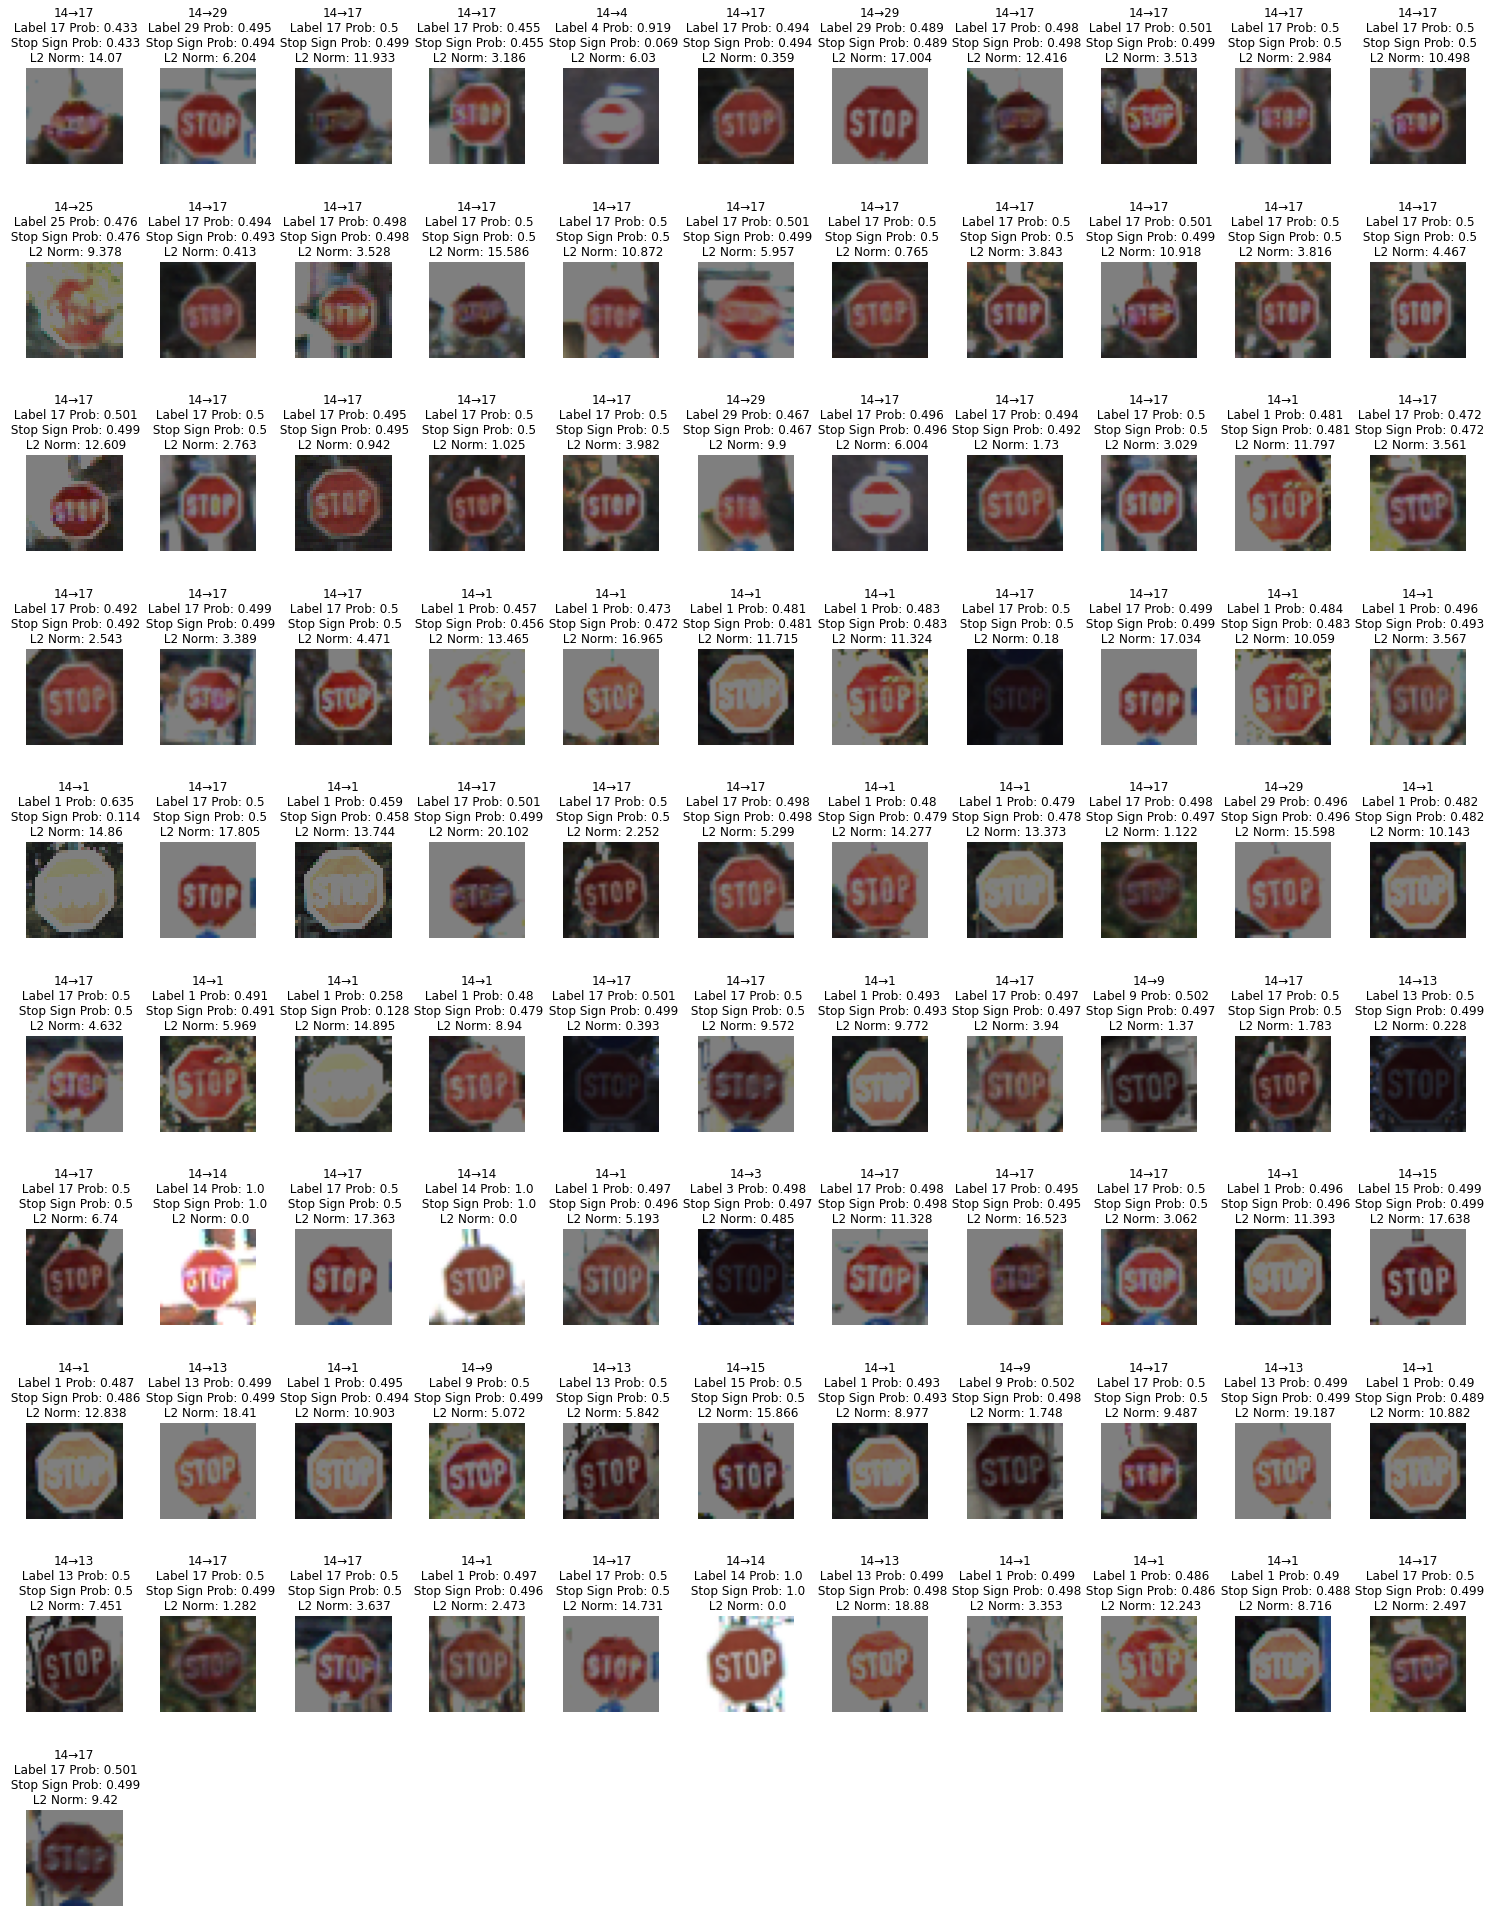

In [54]:
#calculate norm and success rate
#calculate model's predictions for adversarial examples
pred_vector_adv=mod.model.predict(advs)

#get predicted label
pred_labels_adv=np.array([np.argmax(p) for p in pred_vector_adv])

#get number of adv samples not predicted as stop signs
success_advs=len([p for p in pred_labels_adv if p!=14])

#calculate success rate
success_rate=success_advs/pred_labels_adv.shape[0]

#calculate average norm
avg_norm=np.average(np.array([LA.norm(advs[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2) for i in range(advs.shape[0])]))

#return difference between success rate and avg norm 
#output is maximum when avg->0 and success_rate->1

print("Success rate=",success_rate)
print("avg_norm=",avg_norm)


#print img
pred_imgs_adv=[]


for i in range(pred_vector_adv.shape[0]):
    #calculate predicted label
    label_pred_adv = np.argmax(pred_vector_adv[i])

    #calulate predicted label proba
    prob_pred_adv = np.max(pred_vector_adv[i])

    #calculate stop sign proba
    stop_sign_proba = pred_vector_adv[i][14]

    #calculate norm l2 of the difference between adversarial example and original example
    diff=LA.norm(advs[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2)

    pred_imgs_adv.append({"image":advs[i],"predicted_label":label_pred_adv,"real_label":14,
                          "predicted_proba":prob_pred_adv,"stop_sign_proba":stop_sign_proba,"difference":diff})

print("Model's Predictions on adversarial examples")
print("True Label->Predicted Label")
show_images_adv_pred(np.array(pred_imgs_adv),20,18,False,"")

In [51]:
#save images in txt by saving the arrays that represents the images as string byte in the txt file
np.save('imgs.npy', advs, allow_pickle=True)

/home/colucci/Tesi/tf1/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# ZOO TARGETED

In [ ]:
#take images classified as stop sign with the lowest probability
lowest_prob_images_stop_sign_imgs=[i["image"] for i in lowest_prob_images_stop_sign][:100]

#list which contains all adv examples
advs=[]

with tf.Session() as sess:
    #initialize variables (prevent FailedPreconditionError error)
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    
    model.load_weights("Model.weights_zoo.h5")
    
    mod=Modello(model)

    args={"batch_size":128,"img_resize":32,"max_iterations":6000,"print_every":1000,"switch_iterations":100,
         "init_const":0.001,"attack_type":"targeted","use_tanh":False,"lr":5e-4,"confidence":0.0}
    
    blackbox_attack = ZOO(sess,mod,args)

    labelss=np.zeros(43)
    labelss[8]=1  #one-hot encoded target label (target label=2)
    
    
    #cicle through all examples
    for i in lowest_prob_images_stop_sign_imgs:
        adv = blackbox_attack.attack(i,labelss)
                
        advs.append(adv)
        
    
    advs=np.array(advs, dtype=float)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:197.9, real:3.2732e-07, other:0.91455, loss1:0.014843, loss2:197.8865967
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:28426.885, size:(1, 32, 32, 3), loss:1.0326e+07, real:1.7901e-05, other:0.54591, loss1:1.0325e+07, loss2:198.155365
iter:1000 old constant:1000000.0
iter:1000 new constant:10000000.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Success rate= 0.98
avg_norm= 8.396305599118431
Model's Predictions on adversarial examples
True Label->Predicted Label


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

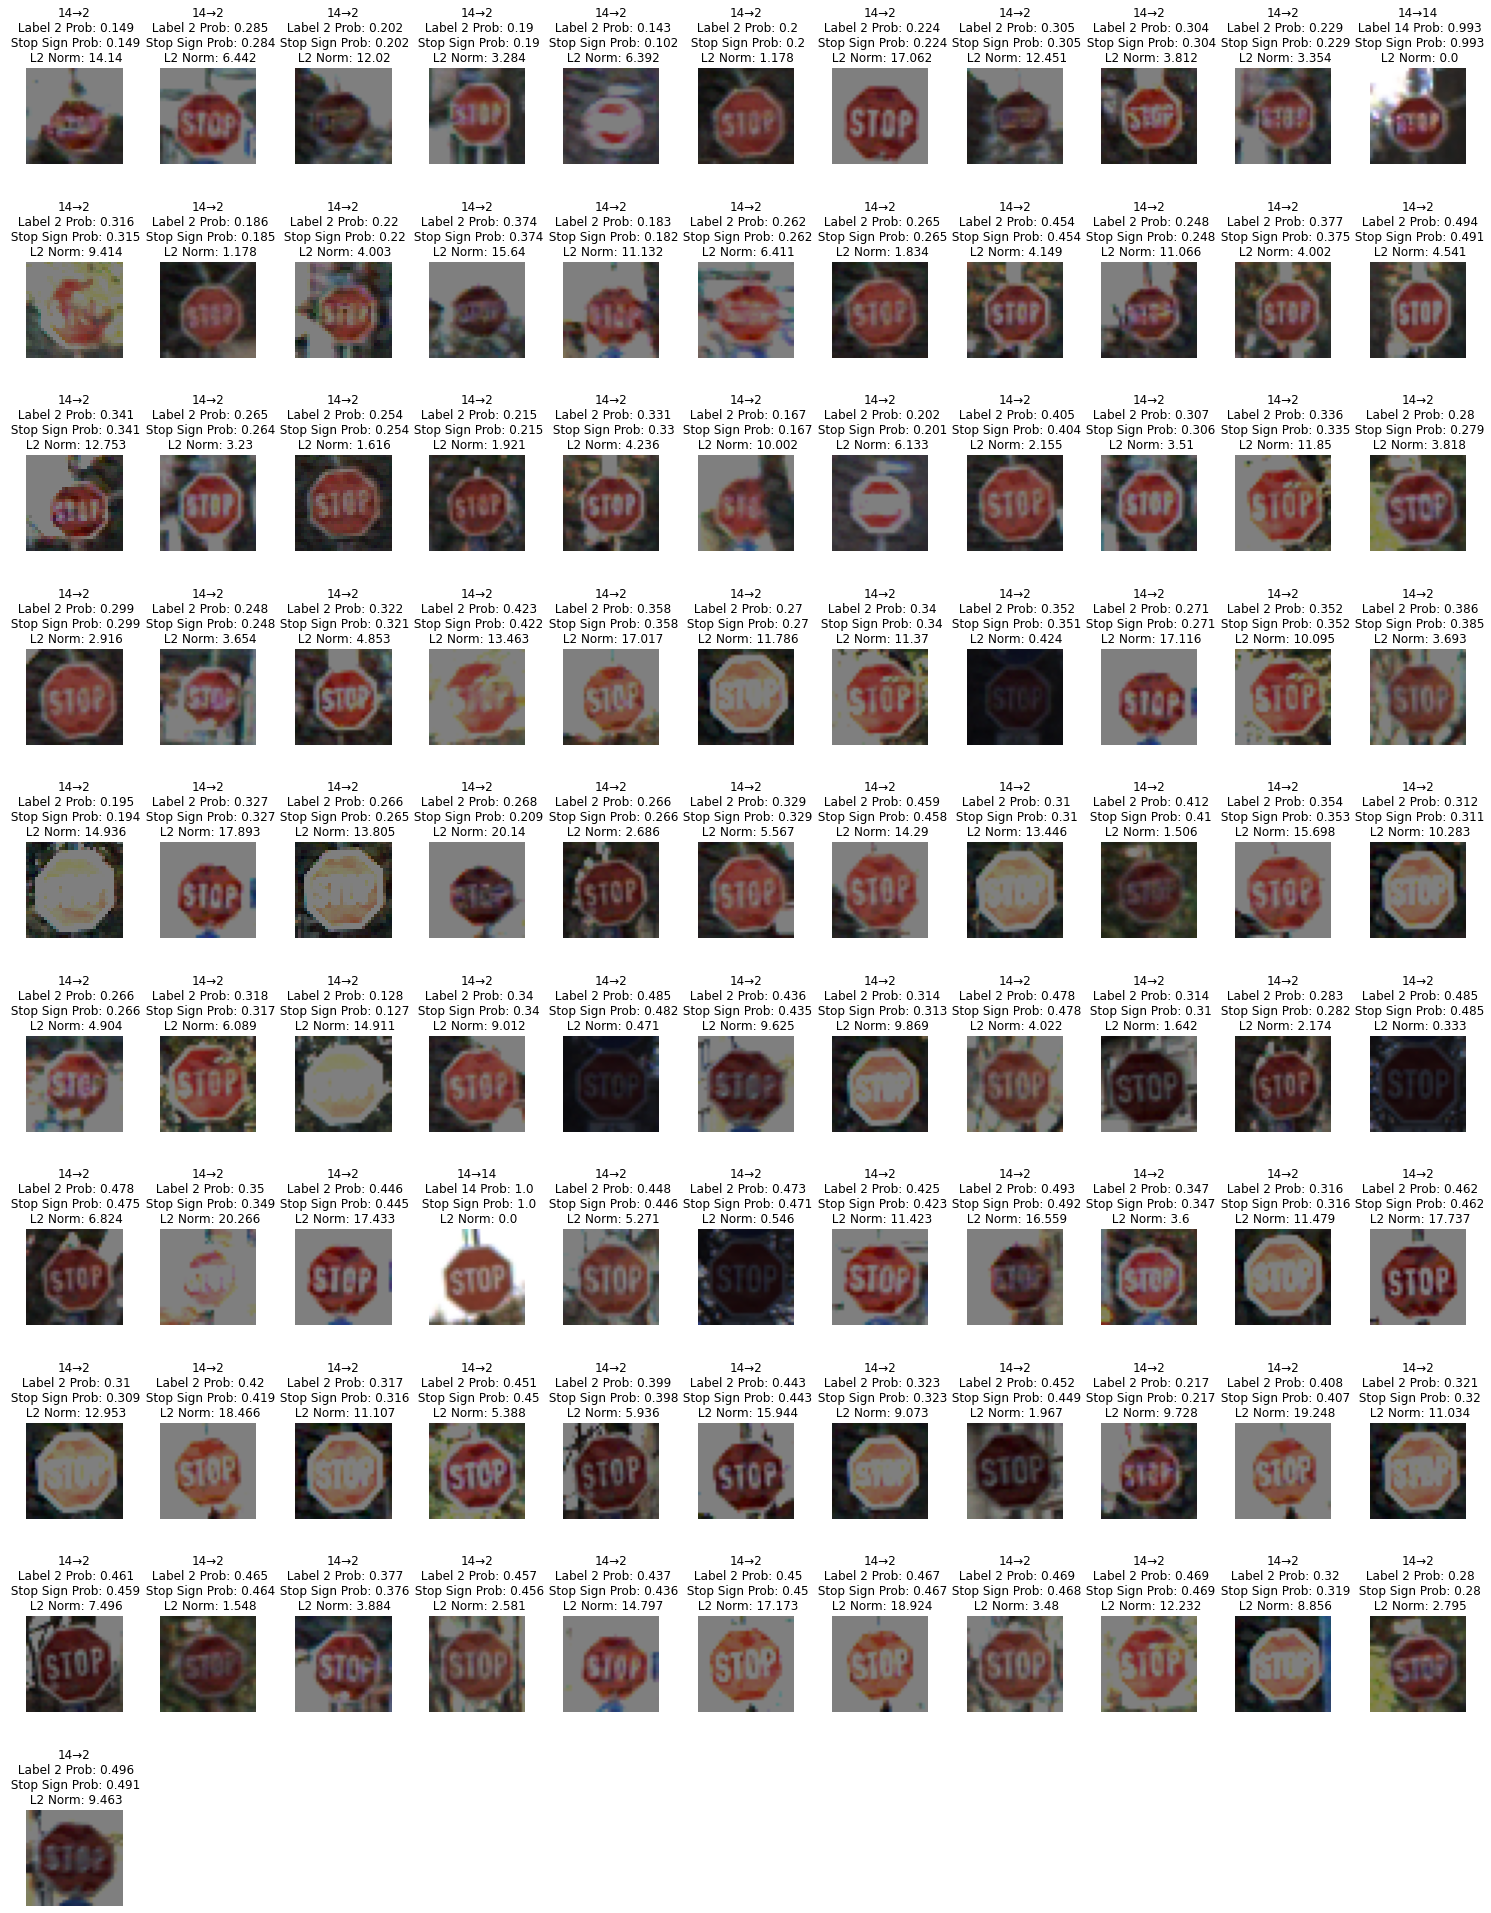

In [36]:
#calculate norm and success rate
#calculate model's predictions for adversarial examples
pred_vector_adv=mod.model.predict(advs)

#get predicted label
pred_labels_adv=np.array([np.argmax(p) for p in pred_vector_adv])

#get number of adv samples not predicted as stop signs
success_advs=len([p for p in pred_labels_adv if p!=14])

#calculate success rate
success_rate=success_advs/pred_labels_adv.shape[0]

#calculate average norm
avg_norm=np.average(np.array([LA.norm(advs[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2) for i in range(advs.shape[0])]))

#return difference between success rate and avg norm 
#output is maximum when avg->0 and success_rate->1

print("Success rate=",success_rate)
print("avg_norm=",avg_norm)


#print img
pred_imgs_adv=[]


for i in range(pred_vector_adv.shape[0]):
    #calculate predicted label
    label_pred_adv = np.argmax(pred_vector_adv[i])

    #calulate predicted label proba
    prob_pred_adv = np.max(pred_vector_adv[i])

    #calculate stop sign proba
    stop_sign_proba = pred_vector_adv[i][14]

    #calculate norm l2 of the difference between adversarial example and original example
    diff=LA.norm(advs[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2)

    pred_imgs_adv.append({"image":advs[i],"predicted_label":label_pred_adv,"real_label":14,
                          "predicted_proba":prob_pred_adv,"stop_sign_proba":stop_sign_proba,"difference":diff})

print("Model's Predictions on adversarial examples")
print("True Label->Predicted Label")
show_images_adv_pred(np.array(pred_imgs_adv),20,18,False,"")

In [34]:
#save images in txt by saving the arrays that represents the images as string byte in the txt file
np.save('imgs.npy', advs, allow_pickle=True)

/home/colucci/Tesi/tf1/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# ZOO ATTACK BAYESIAN OPTIMIZATION WITHOUT KNOW PARAMETERS SPACE

In [17]:
from numpy import linalg as LA 

class ZOO_performance_func:
    def __init__(self, bounds=None, sd=None):
        self.input_dim = 4
        self.bounds = [(1e-4,1),(0,1),(1e-4,1e-2)]   #bonds for initial_const,confidence and learning rate

    def func(self,x):
        c,confidence,lr = x
        
        #list which contains all adv examples
        advs=[]

        with tf.Session() as sess:
            #initialize variables (prevent FailedPreconditionError error)
            init_op = tf.initialize_all_variables()
            sess.run(init_op)

            model.load_weights("Model.weights_zoo.h5")

            mod=Modello(model)

            args={"batch_size":128,"img_resize":32,"max_iterations":1500,"print_every":1000,"switch_iterations":100,
                 "init_const":c,"attack_type":"untargeted","use_tanh":False,"lr":lr,"confidence":confidence}

            blackbox_attack = ZOO(sess,mod,args)

            labelss=np.zeros(43)
            labelss[14]=1  #one-hot encoded label


            #cicle through all examples
            for i in lowest_prob_images_stop_sign_imgs:
                adv = blackbox_attack.attack(i,labelss)

                advs.append(adv)


            advs=np.array(advs) 

        #generate adversarial examples
        x_test_adv = advs

        #calculate model's predictions for adversarial examples
        pred_vector_adv=mod.model.predict(x_test_adv)

        #get predicted label
        pred_labels_adv=np.array([np.argmax(p) for p in pred_vector_adv])

        #get number of adv samples not predicted as stop signs
        success_advs=len([p for p in pred_labels_adv if p!=14])

        #calculate success rate
        success_rate=success_advs/pred_labels_adv.shape[0]

        #calculate average norm
        avg_norm=np.average(np.array([LA.norm(x_test_adv[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2) for i in range(x_test_adv.shape[0])]))

        #return difference between success rate and avg norm 
        #output is maximum when avg->0 and success_rate->1


        #generate and save image of adv examples
        pred_imgs_adv=[]


        for i in range(pred_vector_adv.shape[0]):
            #calculate predicted label
            label_pred_adv = np.argmax(pred_vector_adv[i])

            #calulate predicted label proba
            prob_pred_adv = np.max(pred_vector_adv[i])

            #calculate stop sign proba
            stop_sign_proba = pred_vector_adv[i][14]

            #calculate norm l2 of the difference between adversarial example and original example
            diff=LA.norm(x_test_adv[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2)

            pred_imgs_adv.append({"image":x_test_adv[i],"predicted_label":label_pred_adv,"real_label":14,
                                  "predicted_proba":prob_pred_adv,"stop_sign_proba":stop_sign_proba,"difference":diff})

        show_images_adv_pred(np.array(pred_imgs_adv),20,18,True,"./bayes_opt_res/adv_img_res/attack_c_"+str(c)+"_conf_"+str(confidence)+"_lr_"+str(lr))

        if avg_norm==0:
            result = -100
        else:
            result = success_rate-avg_norm

        print("\n\nSuccess rate=",success_rate)
        print("avg_norm=",avg_norm)
        print("c=",c,"confidence=",confidence,"lr=",lr,"target=",result,"\n\n")

        return result
        

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

import numpy as np
from numpy.linalg import pinv
from scipy.optimize import minimize

import time

In [19]:
# Declare the model one wants to investigate
bm_function = 'Hartman3'


myfunction = ZOO_performance_func()

func = myfunction.func
bounds_all = np.asarray(myfunction.bounds)
box_len = 0.2*np.max(bounds_all[:, 1] - bounds_all[:, 0]) # Box length to be 20% of the original box
print('Box length: {}'.format(box_len))


# Experiments with the proposed alogrithm
epsilon = 0.05 # Set the epsilon-accuracy condition
iter_mul = 10 # Set the evaluation budget, i.e. iter_mul x dim
max_exp = 30 # Set the number of experiments
Y_max_all = []
bounds_final_all = []
X_init_all = []
Y_init_all = []
gp_all = []
regret_all = []
r_optimal_all = []
time_all = []
for n_exp in range(max_exp):

    print('Test Function: ' + bm_function)
    print('Experiment {}:'.format(n_exp))

    # Set seed and initial points
    np.random.seed(n_exp)
    n_init_points = 3*myfunction.input_dim
    gp_exp = []

    # Randomly generate search space
    b_init_center = np.zeros((len(bounds_all), 1))
    for i in range(len(bounds_all)):
        b_init_center[i] = np.random.uniform(bounds_all[i][0]+box_len/2,
                                             bounds_all[i][1]-box_len/2)

    b_init_lower = b_init_center - box_len/2
    b_init_upper = b_init_center + box_len/2
    bounds_user = np.asarray([b_init_lower.ravel(), b_init_upper.ravel()]).T
    bounds = bounds_user.copy()
    b_init_center = np.mean(bounds, axis=1)
    print('Bounds: {}'.format(bounds))

    # Generate and normalize input, ouput
    temp = [np.random.uniform(x[0], x[1], size=n_init_points) for x in bounds]
    temp = np.asarray(temp)
    temp = temp.T
    X_init = list(temp.reshape((n_init_points, -1)))
    print("\n\nParams:",X_init[0])
    Y_init = func(X_init[0])
    for i in range(1, len(X_init)):
        print("\n\nParams:",X_init[i])
        temp = func(X_init[i])
        Y_init = np.append(Y_init, temp)
    Y = (Y_init-np.mean(Y_init))/(np.max(Y_init)-np.min(Y_init))

    # Start measure time
    start = time.time()

    # Fit Gaussian Process
    # Be careful with the fitting methodology (it can be stuck in local minima)
    # Multi-start?
    ls_prior = [0.01, 0.1, 1, 10]
    ml_value = np.zeros(len(ls_prior))
    gp_temp = []
    for idx, ls in enumerate(ls_prior):
        kernel = 1.0 * RBF(length_scale=ls)
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=25)
        gp.fit(X_init, Y)
        gp_temp.append(gp)
        ml_value[idx] = gp.log_marginal_likelihood(gp.kernel_.theta)
    gp = gp_temp[np.min(np.argmax(ml_value))]
    gp_exp.append(gp)
    print('Kernel {} with Log Marginal Likelihood {}'.format(gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)))

    # Extract Gaussian Process hyper-parameters
    # kernel_k2 is the length-scale
    # theta_n is the scale factor
    kernel_k1 = gp.kernel_.get_params()['k1__constant_value']
    kernel_k2 = gp.kernel_.get_params()['k2__length_scale']
    theta_n = np.sqrt(kernel_k1)

    # Re-arrange the initial random observations
    max_iter = iter_mul*myfunction.input_dim
    Y_max = np.zeros((max_iter+n_init_points, 1))
    for i in range(n_init_points):
        Y_max[i] = np.max(Y_init[0:i+1])

    # Set some parameters for b_n and the evaluation budget
    max_iter_i = iter(range(1, max_iter+1))
    nu = 0.2 
    sigma = 0.1
    
    # List to store important values
    regret_iter = []
    r_optimal_iter = []
    bounds_iter = []
    iter_adjust = 0
    regret = 10*epsilon
    for n_iter_i in max_iter_i:

        n_iter = n_iter_i - iter_adjust
        print("Iteration {}".format(n_iter))

        # Compute the acquisition function at the observation points
        # b_n is found by using the correct formula
        lengthscale = gp.kernel_.get_params()['k2__length_scale']
        thetan_2 = gp.kernel_.get_params()['k1__constant_value']
        radius = np.abs(np.max(bounds[:, 1]-bounds[:, 0]))
        b = 1/2*np.sqrt(2)*np.sqrt(thetan_2)/lengthscale
        a = 1
        tau_n = (4*myfunction.input_dim+4)*np.log(n_iter) + 2*np.log(2*np.pi**2/(3*sigma)) \
                + 2*myfunction.input_dim*np.log(myfunction.input_dim*b*radius*np.sqrt(np.log(4*myfunction.input_dim*a/sigma)))
        b_n = np.sqrt(np.abs(nu*tau_n))
        y_init_mean, y_init_std = gp.predict(X_init, return_std=True)
        acq_init = y_init_mean.ravel() + b_n*y_init_std.ravel()
        print('b_n is: {}'.format(b_n))

        # Optimize the acquisition function
        x_max = acq_maximize_fixopt(gp, b_n, bounds)
        max_acq = acq_gp(x_max, gp, b_n)
        y_acq = acq_gp(np.asarray(X_init), gp, b_n)

        # Compute the maximum regret
        X_init_temp = X_init.copy()
        X_init_temp.append(x_max)
        Y_lcb_temp = acq_lcb(np.asarray(X_init_temp), gp, b_n)
        regret = max_acq - np.max(Y_lcb_temp)
        regret_iter.append(regret)
        print('Regret: {}'.format(regret))
        
        # Check if regret < 0, redo the optimization, typically redo the optimization
        # with starting point in X_init_temp
        indices_max_X = np.argsort(Y_lcb_temp)[::-1]
        n_search_X = np.min([20, len(indices_max_X)])
        if (regret + 1/n_iter**2 < 0):
            print('Regret < 0, redo the optimization')
            for i in range(n_search_X):
                x_try = X_init_temp[i]
                # Running L-BFGS-B from x_max
                res = minimize(lambda x: -acq_gp(x, gp, b_n),
                               x_try, bounds=bounds, method="L-BFGS-B")
            
                # Store it if better than previous minimum(maximum).
                if max_acq is None or -res.fun[0] >= max_acq:
                    x_max = res.x
                    max_acq = -res.fun[0]
                
                # Recompute regret
                regret = max_acq - np.max(Y_lcb_temp)
                print('Regret: {}'.format(regret))
            

        # Expand if regret < epsilon or the first iteration
        if (regret <= epsilon - 1/n_iter**2) | (n_iter_i == 1):
            print('Expanding bounds')

            # Expand the search space based on analytical formula in Theorem 1
            K = gram_matrix(X_init, 1, kernel_k2)
            K_inv = pinv(K)
            b = np.matmul(K_inv, Y)
            b_pos = b[b >= 0]
            b_neg = b[b <= 0]
            U, Sigma, V = np.linalg.svd(K_inv)
            lambda_max = np.max(Sigma)
            n = len(X_init)
            gamma = min(0.25*epsilon/max(np.sum(b_pos), -np.sum(b_neg)),
                        1/b_n*np.sqrt((0.5*epsilon*b_n*theta_n-0.0625*epsilon**2)/(n*lambda_max)))

            if (gamma > 1):
                raise ValueError('Gamma needs to be smaller than 1. Something wrong!')

            # Find d_{gamma}
            # For SE kernel, it's easy to find values of r to make k(r) < gamma
            scale_l = np.sqrt(-2*np.log(gamma/kernel_k1))
            print('The scale is: {}'.format(scale_l))

            bounds_ori_all = []
            for n_obs in range(len(acq_init)):
                X0 = X_init[n_obs]
                # Set the rectangle bounds
                bounds_ori_temp = np.asarray((X0 - scale_l*kernel_k2,
                                              X0 + scale_l*kernel_k2))
                bounds_ori = bounds_ori_temp.T
                bounds_ori_all.append(bounds_ori)

            bound_len = scale_l*kernel_k2
            temp = np.asarray(bounds_ori_all)
            temp_min = np.min(temp[:, :, 0], axis=0)
            temp_max = np.max(temp[:, :, 1], axis=0)
            bounds_ori = np.stack((temp_min, temp_max)).T
            bounds_new = bounds_ori.copy()
            print('Old bound: {}'.format(bounds))
            print('New bound: {}'.format(bounds_new))

            # Recompute bounds
            bounds = bounds_new.copy()
            bounds_iter.append(bounds)

            # Adjust iteration after adjusting bounds
            iter_adjust += (n_iter - 1)

            # Re-optimize the acquisition function with the new bound
            # and the new b_n
            n_iter = n_iter_i - iter_adjust 
            lengthscale = gp.kernel_.get_params()['k2__length_scale']
            thetan_2 = gp.kernel_.get_params()['k1__constant_value']
            radius = np.abs(np.max(bounds[:, 1]-bounds[:, 0]))
            b = 1/2*np.sqrt(2)*np.sqrt(thetan_2)/lengthscale
            a = 1
            tau_n = (4*myfunction.input_dim+4)*np.log(n_iter) + 2*np.log(2*np.pi**2/(3*sigma)) \
                    + 2*myfunction.input_dim*np.log(myfunction.input_dim*b*radius*np.sqrt(np.log(4*myfunction.input_dim*a/sigma)))
            b_n = np.sqrt(np.abs(nu*tau_n))

            x_max = acq_maximize_fixopt(gp, b_n, bounds)
            max_acq = acq_gp(x_max, gp, b_n)
            y_acq = acq_gp(np.asarray(X_init), gp, b_n)


            # Save some parameters of the bound
            X_init_bound = X_init.copy()
            Y_bound = Y.copy()
            lengthscale_bound = gp.kernel_.get_params()['k2__length_scale']
            scale_l_bound = scale_l

        # Check if the acquistion function argmax is at infinity
        # Then re-optimize within the bound that has the largest Y value
        if ((max_acq - b_n*np.sqrt(thetan_2)) >= -epsilon) & ((max_acq - b_n*np.sqrt(thetan_2)) <= 0):
            print('Re-optimize within smaller spheres')
            indices_max = np.argsort(Y_bound)[::-1]
            
            # Set a minimal number of local optimizations
            n_search = np.min([5, len(indices_max)])
            for i in range(n_search):
                X0 = X_init_bound[indices_max[i]]
                bounds_new = np.asarray((X0 - bound_len,
                                        X0 + bound_len))
                bounds_new = bounds_new.T
                x_max_local = acq_maximize_fixopt_local(gp, b_n, bounds_new, acq_type='ucb')
                max_acq_local = acq_gp(x_max_local, gp, b_n)
                max_inf = b_n*np.sqrt(gp.kernel_.get_params()['k1__constant_value'])
                if np.abs(max_acq_local-max_inf) <= epsilon:
                    x_max = x_max_local
                    break

        # Compute y_max
        y_max = func(x_max)
        Y_init = np.append(Y_init, y_max)
        X_init.append(x_max)
        Y = (Y_init-np.mean(Y_init))/(np.max(Y_init)-np.min(Y_init))

        # Update the kernel
        gp = GaussianProcessRegressor(kernel=kernel,
                                      n_restarts_optimizer=25)
        gp.fit(X_init, Y)
        gp_exp.append(gp)
        print('Kernel {} with Log Marginal Likelihood {}'.format(gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)))

        # Extract Gaussian Process hyper-parameters and update prior kernel
        # kernel_k2 is the length-scale
        # theta_n is the scale factor
        kernel_k1 = gp.kernel_.get_params()['k1__constant_value']
        kernel_k2 = gp.kernel_.get_params()['k2__length_scale']
        theta_n = np.sqrt(kernel_k1)
        kernel = kernel_k1*RBF(length_scale=kernel_k2)

        print('Maximum of y: {}'.format(np.max(Y_init)))
        Y_max[n_init_points+n_iter_i-1, 0] = np.max(Y_init)

    # End measuring time
    end = time.time()
    time_search_train = end-start
    print('Time cost (seconds): {:.2f}'.format(time_search_train))
    time_all.append(time_search_train)

    Y_max_all.append(Y_max)
    X_init_all.append(X_init)
    Y_init_all.append(Y_init)
    regret_all.append(regret_iter)
    r_optimal_all.append(r_optimal_iter)
    bounds_final_all.append(bounds_iter)

    '''
    # Save the list to files
    filename = 'results/result_' + bm_function + '_proposed_GPUBO_eps' +  str(epsilon).replace('.', '') + '.npz'
    np.savez(filename,
             *Y_max_all, *bounds_final_all, *X_init_all, *Y_init_all,
             *regret_all, *r_optimal_all, *bounds_final_all, *time_all)
    '''




Box length: 0.2
Test Function: Hartman3
Experiment 0:
Bounds: [[ 0.43909592  0.63909592]
 [ 0.57215149  0.77215149]
 [-0.11448532  0.08551468]]


Params: [0.54807256 0.58957735 0.07444847]
[Info][Iter] iter:0, const:0.5480725583908466, cost:0, time:0.000, size:(1, 32, 32, 3), loss:199.77, real:0.91455, other:0.029269, loss1:1.8864, loss2:197.8865967
##### Reset ADAM #####


KeyboardInterrupt: 

# BAYES OPT

In [16]:
def zoo_performances_untargeted(c,confidence,lr):
    
    print("\n\nc=",c,"confidence=",confidence,"lr=",lr,"\n\n")
    
    #take images classified as stop sign with the lowest probability
    lowest_prob_images_stop_sign_imgs=[i["image"] for i in lowest_prob_images_stop_sign][:100]

    #list which contains all adv examples
    advs=[]

    with tf.Session() as sess:
        #initialize variables (prevent FailedPreconditionError error)
        init_op = tf.initialize_all_variables()
        sess.run(init_op)

        model.load_weights("Model.weights_zoo.h5")

        mod=Modello(model)

        args={"batch_size":128,"img_resize":32,"max_iterations":1500,"print_every":1000,"switch_iterations":100,
             "init_const":c,"attack_type":"untargeted","use_tanh":False,"lr":lr,"confidence":confidence}

        blackbox_attack = ZOO(sess,mod,args)

        labelss=np.zeros(43)
        labelss[14]=1  #one-hot encoded label


        #cicle through all examples
        for i in lowest_prob_images_stop_sign_imgs:
            adv = blackbox_attack.attack(i,labelss)

            advs.append(adv)


        advs=np.array(advs) 

    #generate adversarial examples
    x_test_adv = advs

    #calculate model's predictions for adversarial examples
    pred_vector_adv=mod.model.predict(x_test_adv)

    #get predicted label
    pred_labels_adv=np.array([np.argmax(p) for p in pred_vector_adv])

    #get number of adv samples not predicted as stop signs
    success_advs=len([p for p in pred_labels_adv if p!=14])

    #calculate success rate
    success_rate=success_advs/pred_labels_adv.shape[0]

    #calculate average norm
    avg_norm=np.average(np.array([LA.norm(x_test_adv[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2) for i in range(x_test_adv.shape[0])]))

    #return difference between success rate and avg norm 
    #output is maximum when avg->0 and success_rate->1


    #generate and save image of adv examples
    pred_imgs_adv=[]


    for i in range(pred_vector_adv.shape[0]):
        #calculate predicted label
        label_pred_adv = np.argmax(pred_vector_adv[i])

        #calulate predicted label proba
        prob_pred_adv = np.max(pred_vector_adv[i])

        #calculate stop sign proba
        stop_sign_proba = pred_vector_adv[i][14]

        #calculate norm l2 of the difference between adversarial example and original example
        diff=LA.norm(x_test_adv[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2)

        pred_imgs_adv.append({"image":x_test_adv[i],"predicted_label":label_pred_adv,"real_label":14,
                              "predicted_proba":prob_pred_adv,"stop_sign_proba":stop_sign_proba,"difference":diff})

    show_images_adv_pred(np.array(pred_imgs_adv),20,18,True,"./bayes_opt_res/untargeted/adv_img_res/attack_c_"+str(c)+"_conf_"+str(confidence)+"_lr_"+str(lr))

    if avg_norm==0:
        result = -100
    else:
        result = success_rate-avg_norm

    with open('./bayes_opt_res/untargeted/results.txt', 'a') as f:
        print("\n\nSuccess rate=",success_rate,file=f)
        print("avg_norm=",avg_norm,file=f)
        print("c=",c,"confidence=",confidence,"lr=",lr,"target=",result,"\n\n",file=f)

    return result

In [26]:
def zoo_performances_targeted(c,confidence,lr):
    
    print("\n\nc=",c,"confidence=",confidence,"lr=",lr,"\n\n")
    
    #take images classified as stop sign with the lowest probability
    lowest_prob_images_stop_sign_imgs=[i["image"] for i in lowest_prob_images_stop_sign][:100]

    #list which contains all adv examples
    advs=[]

    with tf.Session() as sess:
        #initialize variables (prevent FailedPreconditionError error)
        init_op = tf.initialize_all_variables()
        sess.run(init_op)

        model.load_weights("Model.weights_zoo.h5")

        mod=Modello(model)

        args={"batch_size":128,"img_resize":32,"max_iterations":4000,"print_every":1000,"switch_iterations":100,
         "init_const":0.001,"attack_type":"targeted","use_tanh":False,"lr":5e-4,"confidence":0.0}

        blackbox_attack = ZOO(sess,mod,args)

        labelss=np.zeros(43)
        labelss[8]=1  #one-hot encoded label


        #cicle through all examples
        for i in lowest_prob_images_stop_sign_imgs:
            adv = blackbox_attack.attack(i,labelss)

            advs.append(adv)


        advs=np.array(advs) 

    #generate adversarial examples
    x_test_adv = advs

    #calculate model's predictions for adversarial examples
    pred_vector_adv=mod.model.predict(x_test_adv)

    #get predicted label
    pred_labels_adv=np.array([np.argmax(p) for p in pred_vector_adv])

    #get number of adv samples not predicted as stop signs
    success_advs=len([p for p in pred_labels_adv if p==8])

    #calculate success rate
    success_rate=success_advs/pred_labels_adv.shape[0]

    #calculate average norm
    avg_norm=np.average(np.array([LA.norm(x_test_adv[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2) for i in range(x_test_adv.shape[0])]))

    #return difference between success rate and avg norm 
    #output is maximum when avg->0 and success_rate->1


    #generate and save image of adv examples
    pred_imgs_adv=[]


    for i in range(pred_vector_adv.shape[0]):
        #calculate predicted label
        label_pred_adv = np.argmax(pred_vector_adv[i])

        #calulate predicted label proba
        prob_pred_adv = np.max(pred_vector_adv[i])

        #calculate stop sign proba
        stop_sign_proba = pred_vector_adv[i][14]

        #calculate norm l2 of the difference between adversarial example and original example
        diff=LA.norm(x_test_adv[i].ravel()-lowest_prob_images_stop_sign_imgs[i].ravel(),2)

        pred_imgs_adv.append({"image":x_test_adv[i],"predicted_label":label_pred_adv,"real_label":14,
                              "predicted_proba":prob_pred_adv,"stop_sign_proba":stop_sign_proba,"difference":diff})

    show_images_adv_pred(np.array(pred_imgs_adv),20,18,True,"./bayes_opt_res/targeted/adv_img_res/attack_c_"+str(c)+"_conf_"+str(confidence)+"_lr_"+str(lr))

    if avg_norm==0:
        result = -100
    else:
        result = success_rate-avg_norm

    with open('./bayes_opt_res/targeted/results.txt', 'a') as f:
        print("\n\nSuccess rate=",success_rate,file=f)
        print("avg_norm=",avg_norm,file=f)
        print("c=",c,"confidence=",confidence,"lr=",lr,"target=",result,"\n\n",file=f)

    return result

Define parameters spaces

In [18]:
from bayes_opt import BayesianOptimization, UtilityFunction
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events
from bayes_opt.util import load_logs

#parameter's space for untargeted zoo
pbounds_untargeted = {'c': (1e-4,1), 'confidence':(0,1), 'lr':(0.0001,0.1)}

#parameter's space for targeted zoo
pbounds_targeted = {'c': (1e-3,10), 'confidence':(0,1), 'lr':(0.0001,0.1)}

Untargeted zoo bayes opt

In [23]:
#define the optimizer
optimizer_untargeted = BayesianOptimization(
    f=zoo_performances_untargeted,
    pbounds=pbounds_untargeted,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
)

load_logs(optimizer_untargeted, logs=["./bayes_opt_res/untargeted/bayes_opt.log.json"]);

logger = JSONLogger(path="./bayes_opt_res/untargeted/bayes_opt.log",reset=False)
optimizer_untargeted.subscribe(Events.OPTIMIZATION_STEP, logger)

In [24]:
#perform the optimiztion   
#we use 5 as kappa in order to prefer nor exploitation and exploration

acquisition_function = UtilityFunction(kind="ucb", kappa=5)
optimizer_untargeted.maximize(
    init_points=0,  #step of random exploration to do before starting the effectively search of the maximum of the funcion
    #initial points was set to 5
    n_iter=100, #n_iter that the optimization algorithm has to perform after the initial random exploration steps
    acquisition_function=acquisition_function
)



c= 0.14849859065776436 confidence= 0.0 lr= 0.0001 


[Info][Iter] iter:0, const:0.14849859065776436, cost:0, time:0.000, size:(1, 32, 32, 3), loss:198.4, real:0.91455, other:0.029269, loss1:0.51112, loss2:197.8865967
iter:100 old constant:0.14849859065776436
iter:100 new constant:1.4849859065776436
iter:200 old constant:1.4849859065776436
iter:200 new constant:14.849859065776435
iter:300 old constant:14.849859065776435
iter:300 new constant:148.49859065776434
iter:400 old constant:148.49859065776434
iter:400 new constant:1484.9859065776434
iter:500 old constant:1484.9859065776434
iter:500 new constant:14849.859065776434
iter:600 old constant:14849.859065776434
iter:600 new constant:148498.59065776435
iter:700 old constant:148498.59065776435
iter:700 new constant:1484985.9065776435
iter:800 old constant:1484985.9065776435
iter:800 new constant:14849859.065776434
iter:900 old constant:14849859.065776434
iter:900 new constant:148498590.65776435
[Info][Iter] iter:1000, const:148498590.65

KeyboardInterrupt: 

Targeted zoo bayes opt

In [29]:
#define the optimizer
optimizer_targeted = BayesianOptimization(
    f=zoo_performances_targeted,
    pbounds=pbounds_targeted,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
)

load_logs(optimizer_targeted, logs=["./bayes_opt_res/targeted/bayes_opt.log.json"]);

logger = JSONLogger(path="./bayes_opt_res/targeted/bayes_opt.log",reset=False)
optimizer_targeted.subscribe(Events.OPTIMIZATION_STEP, logger)

In [ ]:
#perform the optimiztion   
#we use 5 as kappa in order to prefer nor exploitation and exploration

acquisition_function = UtilityFunction(kind="ucb", kappa=5)
optimizer_targeted.maximize(
    init_points=0,  #step of random exploration to do before starting the effectively search of the maximum of the funcion
    #initial points was set to 5
    n_iter=100, #n_iter that the optimization algorithm has to perform after the initial random exploration steps
    acquisition_function=acquisition_function
)



c= 3.665049196033062 confidence= 0.5600417226867772 lr= 0.06569925192947113 


[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:197.9, real:2.0516e-05, other:0.91455, loss1:0.010705, loss2:197.8865967
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:43036.776, size:(1, 32, 32, 3), loss:4.9325e+06, real:0.0017742, other:0.24609, loss1:4.9323e+06, loss2:198.1712494
iter:1000 old constant:1000000.0
iter:1000 new constant:10000000.0
iter:1100 old co

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:33763.359, size:(1, 32, 32, 3), loss:1.9149e+07, real:4.8297e-09, other:0.99996, loss1:1.9148e+07, loss2:309.5599365
iter:1000 old constant:1000000.0
iter:1000 new constant:10000000.0
iter:1100 old constant:10000000.0
iter:1100 new constant:100000000.0
iter:1200 old constant:100000000.0
CONST > 1e8, no change
iter:1200 new constant:100000000.0
iter:1300 old constant:100000000.0
CONST > 1e8, no change
iter:1300 new constant:100000000.0
iter:1400 old constant:100000000.0
CONST > 1e8, no change
iter:1400 new constant:100000000.0
iter:1500

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i



c= 2.5009607692394473 confidence= 0.06671225040238127 lr= 0.03305588480125951 


[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:197.9, real:2.0516e-05, other:0.91455, loss1:0.010705, loss2:197.8865967
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:33580.196, size:(1, 32, 32, 3), loss:5.0266e+06, real:0.0017175, other:0.26172, loss1:5.0264e+06, loss2:198.1774139
iter:1000 old constant:1000000.0
iter:1000 new constant:10000000.0
iter:1100 old 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i



c= 8.162300214151943 confidence= 0.7158844147893758 lr= 0.021821772801898665 


[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:197.9, real:2.0516e-05, other:0.91455, loss1:0.010705, loss2:197.8865967
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:33472.569, size:(1, 32, 32, 3), loss:5.0818e+06, real:0.0016883, other:0.27186, loss1:5.0816e+06, loss2:198.1699829
iter:1000 old constant:1000000.0
iter:1000 new constant:10000000.0
iter:1100 old c

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iter:2700 old constant:195312.5
iter:2700 new constant:97656.25
iter:2800 old constant:97656.25
iter:2800 new constant:48828.125
iter:2900 old constant:48828.125
iter:2900 new constant:24414.0625
[Info][Iter] iter:3000, const:24414.0625, cost:768000, time:299218.601, size:(1, 32, 32, 3), loss:13.424, real:0.41853, other:0.41682, loss1:0, loss2:13.42393684
iter:3000 old constant:24414.0625
iter:3000 new constant:12207.03125
iter:3100 old constant:12207.03125
iter:3100 new constant:6103.515625
iter:3200 old constant:6103.515625
iter:3200 new constant:3051.7578125
iter:3300 old constant:3051.7578125
iter:3300 new constant:1525.87890625
iter:3400 old constant:1525.87890625
iter:3400 new constant:762.939453125
iter:3500 old constant:762.939453125
iter:3500 new constant:381.4697265625
iter:3600 old constant:381.4697265625
iter:3600 new constant:190.73486328125
iter:3700 old constant:190.73486328125
iter:3700 new constant:95.367431640625
iter:3800 old constant:95.367431640625
iter:3800 new co

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i



c= 5.6449225143449215 confidence= 0.7696980819287338 lr= 0.09729373056820534 


[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:197.9, real:2.0516e-05, other:0.91455, loss1:0.010705, loss2:197.8865967
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:34465.092, size:(1, 32, 32, 3), loss:5.0053e+06, real:0.0017466, other:0.26056, loss1:5.0051e+06, loss2:198.1762085
iter:1000 old constant:1000000.0
iter:1000 new constant:10000000.0
iter:1100 old c

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iter:3600 old constant:97656.25
iter:3600 new constant:48828.125
iter:3700 old constant:48828.125
iter:3700 new constant:24414.0625
iter:3800 old constant:24414.0625
iter:3800 new constant:12207.03125
iter:3900 old constant:12207.03125
iter:3900 new constant:6103.515625
[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:7.3284, real:1.2249e-10, other:0.99762, loss1:0.022821, loss2:7.305619717
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:32806.60

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i



c= 9.65768323217191 confidence= 0.6872900541547912 lr= 0.06648041700133112 


[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:197.9, real:2.0516e-05, other:0.91455, loss1:0.010705, loss2:197.8865967
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
iter:400 old constant:1.0
iter:400 new constant:10.0
iter:500 old constant:10.0
iter:500 new constant:100.0
iter:600 old constant:100.0
iter:600 new constant:1000.0
iter:700 old constant:1000.0
iter:700 new constant:10000.0
iter:800 old constant:10000.0
iter:800 new constant:100000.0
iter:900 old constant:100000.0
iter:900 new constant:1000000.0
[Info][Iter] iter:1000, const:1000000.0, cost:256000, time:60078.253, size:(1, 32, 32, 3), loss:5.1393e+06, real:0.0016158, other:0.27562, loss1:5.1391e+06, loss2:198.1689758
iter:1000 old constant:1000000.0
iter:1000 new constant:10000000.0
iter:1100 old con

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[Info][Iter] iter:2000, const:100000000.0, cost:512000, time:140238.467, size:(1, 32, 32, 3), loss:5.2013e+08, real:0.0022116, other:0.40142, loss1:5.2013e+08, loss2:5.421695232
iter:2000 old constant:100000000.0
CONST > 1e8, no change
iter:2000 new constant:100000000.0
iter:2100 old constant:100000000.0
CONST > 1e8, no change
iter:2100 new constant:100000000.0
iter:2200 old constant:100000000.0
CONST > 1e8, no change
iter:2200 new constant:100000000.0
iter:2300 old constant:100000000.0
CONST > 1e8, no change
iter:2300 new constant:100000000.0
iter:2400 old constant:100000000.0
CONST > 1e8, no change
iter:2400 new constant:100000000.0
iter:2500 old constant:100000000.0
CONST > 1e8, no change
iter:2500 new constant:100000000.0
##### Reset ADAM #####
[STATS][FirstAttack] iter:2588, const:100000000.0, cost:662784, time:235008.522, size:(1, 32, 32, 3), loss:6.8547, loss1:0, loss2:6.8547, l2:6.8547
iter:2600 old constant:100000000.0
iter:2600 new constant:50000000.0
iter:2700 old constant:5

# BADNETS CLEAN-LABEL ATTACK USING ZOO

In [12]:
import art.attacks.poisoning.backdoor_attack as BADNETS
from art.attacks.poisoning.perturbations import add_pattern_bd, add_single_bd, insert_image
from art.utils import to_categorical

/home/colucci/Tesi/tf1/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/colucci/Tesi/tf1/lib/python3.6/site-packages/art/estimators/certification/__init__.py:29: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [13]:
PP_POISON = 0.6
pos = [10,10]
trigger_dimension = 3
target_class = 2
trigger_path = "../backdoor triggers/backdoor_trigger_3_diagonal.png"

In [29]:
def poison_dataset_clean_label(x_clean, y_clean, x_pos, indices, poison_func):
    '''
    Function to poison a dataset

    x_clean: vector of features of samples of the clean dataset
    y_clean: vector of labels of samples of the clean dataset
    x_pos: images among x_clean that have to be poisoned and added to x_clean
    y_pos: labels of x_pos
    indices: indices of x_pos among x_clean vector
    poison_func: inser_image function to insert the trigger in the image
    '''
    x_poison = np.copy(x_clean)
    is_poison = np.zeros(np.shape(y_clean)[0])

    backdoor_attack = BADNETS.PoisoningAttackBackdoor(poison_func)
    poison_images, poison_labels = backdoor_attack.poison(
        x=x_pos, y=to_categorical([target_class], 43)[0]
    )
    
    x_poison[indices]=poison_images
    is_poison[indices]=1

    is_poison = is_poison != 0

    return is_poison, x_poison

In [15]:
def backdoor_poisoning_success_rate(clf, x_poisoned, y_poisoned):
    '''
    Function to calculate success rate of the attack

    clf: classifier
    x_poisoned: features vector of poisoned validation samples
    y_poisoned: vector of target label we want to classify poisoned samples as
    '''
    
    #If the attack went good, we will have that every prediction will be wrong
    #so the success rate is 1 - the accuracy on the poisoned validation set

    success_rate=clf.evaluate(x_poisoned,y_poisoned,verbose=0)

    return 1-success_rate[1]

Define training examples that have to be poisoned

In [100]:
#get the training examples that have to be poisoned then.
imgs_to_be_poisoned = []
imgs_to_be_poisoned_labels = []

'''
for i in range(43):
    x_images_class_i=np.array(X_train[y_train==i])

    num_poison = int(x_images_class_i.shape[0]*PP_POISON)

    if num_poison:
        #take first "num_poison" indexes representing indexes of samples that are going
        #to be poisoned
        indices_to_be_poisoned=range(num_poison)

        for im in x_images_class_i[indices_to_be_poisoned]:
            imgs_to_be_poisoned.append(im)
            imgs_to_be_poisoned_labels.append(i)
'''

x_images_class_i=np.array(X_train[y_train==target_class])

num_poison = int(x_images_class_i.shape[0]*PP_POISON)

indices_poisoned=np.arange(y_train.shape[0])
indices_poisoned=np.array(indices_poisoned[y_train==target_class])[:num_poison]

if num_poison:
    #take first "num_poison" indexes representing indexes of samples that are going
    #to be poisoned
    indices_to_be_poisoned=range(num_poison)

    for im in x_images_class_i[indices_to_be_poisoned]:
        imgs_to_be_poisoned.append(im)
        imgs_to_be_poisoned_labels.append(target_class)

imgs_to_be_poisoned = np.array(imgs_to_be_poisoned)
imgs_to_be_poisoned_labels = np.array(imgs_to_be_poisoned_labels)

In [101]:
np.array(imgs_to_be_poisoned).shape

(938, 32, 32, 3)

Create adversarial examples of examples that have to be poisoned using zoo attack

In [ ]:
advs=[]

In [24]:
#create adversarial examples from train examples that will be poisoned then.
#list which contains all adv examples

with tf.Session() as sess:
    #initialize variables (prevent FailedPreconditionError error)
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    
    model.load_weights("Model.weights_zoo.h5")
    
    mod=Modello(model)

    '''
    args={"batch_size":128,"img_resize":32,"max_iterations":6000,"print_every":1000,"switch_iterations":100,
         "init_const":0.001,"attack_type":"targeted","use_tanh":False,"lr":5e-4,"confidence":0.0}
         
    args={"batch_size":128,"img_resize":32,"max_iterations":2500,"print_every":1000,"switch_iterations":100,
         "init_const":0.001,"attack_type":"untargeted","use_tanh":False,"lr":5e-4,"confidence":0.0}
    '''
    args={"batch_size":128,"img_resize":32,"max_iterations":1500,"print_every":1000,"switch_iterations":100,
         "init_const":0.001,"attack_type":"untargeted","use_tanh":False,"lr":5e-4,"confidence":0.0}
    
    
    blackbox_attack = ZOO(sess,mod,args)

    labelss=np.zeros(43)
    labelss[target_class]=1  #one-hot encoded label
    
    count=493
    
    #cicle through all examples
    '''
    for i in np.array(imgs_to_be_poisoned)[2466:]:
    '''
    for i in np.array(imgs_to_be_poisoned)[493:]:
        print("\n\n\n",count,"\n\n\n")
        
        adv = blackbox_attack.attack(i,labelss)
                
        advs.append(adv)
        
        count=count+1
    
    advs=np.array(advs)




 493 



[Info][Iter] iter:0, const:0.001, cost:0, time:0.000, size:(1, 32, 32, 3), loss:0.07146, real:0.99952, other:0.00043412, loss1:0.0077417, loss2:0.06371783465
iter:100 old constant:0.001
iter:100 new constant:0.01
iter:200 old constant:0.01
iter:200 new constant:0.1
iter:300 old constant:0.1
iter:300 new constant:1.0
##### Reset ADAM #####
[STATS][FirstAttack] iter:399, const:1.0, cost:102400, time:3840.564, size:(1, 32, 32, 3), loss:0.11332, loss1:0, loss2:0.11332, l2:0.11332
iter:400 old constant:1.0
iter:400 new constant:0.5
iter:500 old constant:0.5
iter:500 new constant:0.25
iter:600 old constant:0.25
iter:600 new constant:0.125
iter:700 old constant:0.125
iter:700 new constant:0.0625
iter:800 old constant:0.0625
iter:800 new constant:0.03125
iter:900 old constant:0.03125
iter:900 new constant:0.015625
[Info][Iter] iter:1000, const:0.015625, cost:256000, time:23962.305, size:(1, 32, 32, 3), loss:0.092969, real:0.49729, other:0.50207, loss1:0, loss2:0.09296895564
iter:10

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iter:500 old constant:0.0004375
iter:500 new constant:0.00040625000000000004
iter:600 old constant:0.00040625000000000004
iter:600 new constant:0.000390625
iter:700 old constant:0.000390625
iter:700 new constant:0.00039843750000000003
iter:800 old constant:0.00039843750000000003
iter:800 new constant:0.00040234375000000003
iter:900 old constant:0.00040234375000000003
iter:900 new constant:0.00040429687500000003
[Info][Iter] iter:1000, const:0.00040429687500000003, cost:256000, time:24193.205, size:(1, 32, 32, 3), loss:0.4477, real:0.50648, other:0.4929, loss1:1.0988e-05, loss2:0.4476930201
iter:1000 old constant:0.00040429687500000003
iter:1000 new constant:0.00040332031250000003
iter:1100 old constant:0.00040332031250000003
iter:1100 new constant:0.00040380859375000003
iter:1200 old constant:0.00040380859375000003
iter:1200 new constant:0.000403564453125
iter:1300 old constant:0.000403564453125
iter:1300 new constant:0.0004034423828125
iter:1400 old constant:0.0004034423828125
iter:14

KeyboardInterrupt: 

In [25]:
np.array(advs).shape

(909, 32, 32, 3)

In [37]:
'''
advs_until_2466 = np.load('imgs_badnets_clean_label_until_2466.npy', allow_pickle=True)
final_advs = np.concatenate([advs_until_2466,advs])
print(advs.shape)
np.save('imgs_badnets_clean_label.npy', np.array(final_advs, dtype=float), allow_pickle=True)
'''

(5189, 32, 32, 3)


In [45]:
final_advs_tot = np.concatenate([final_advs,advs,imgs_496])

In [77]:
final_advs.shape

(938, 32, 32, 3)

In [26]:
#final_advs=advs
np.save('imgs_badnets_clean_label_new_first_909.npy', np.array(advs, dtype=float), allow_pickle=True)

In [102]:
final_advs = np.load('imgs_badnets_clean_label_new_938.npy', allow_pickle=True)

Calculate zoo attack success rate and norm of difference

In [80]:
model.load_weights("Model.weights_zoo.h5")
#calculate norm and success rate
#calculate model's predictions for adversarial examples
pred_vector_adv=model.predict(final_advs)

#get predicted label
pred_labels_adv=np.array([np.argmax(p) for p in pred_vector_adv])

#get number of adv samples not predicted as stop signs
success_advs=len([p for p in pred_labels_adv if p!=target_class])

#calculate success rate
success_rate=success_advs/pred_labels_adv.shape[0]

#calculate average norm
arr_norms = np.array([LA.norm(final_advs[i].ravel()-imgs_to_be_poisoned[i].ravel(),2) for i in range(final_advs.shape[0])])
avg_norm=np.average(arr_norms)

#return difference between success rate and avg norm 
#output is maximum when avg->0 and success_rate->1

print("Success rate=",success_rate)
print("avg_norm=",avg_norm)


Success rate= 0.9989339019189766
avg_norm= 6.847330360621407


Get only samples with norm under 10

In [103]:
final_advs_norm_under_10 = final_advs[arr_norms<6]
indices_poisoned = indices_poisoned[arr_norms<6]
print(final_advs_norm_under_10.shape)
final_advs = final_advs_norm_under_10

(487, 32, 32, 3)


Creating poisoned validation dataset

Poisoning the entire validation dataset...
Example of posioned sample


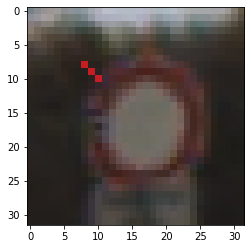

In [84]:
#adjust position pixel value based on trigger dimension
x_pos=(pos[0]-trigger_dimension+1) if (pos[0]-trigger_dimension+1)>0 else 0
y_pos=(pos[0]-trigger_dimension+1) if (pos[0]-trigger_dimension+1)>0 else 0

#initially create the poisoned validation dataset to use in order to test if the model misclassify
#unseen sampels with the trigger on them as the target class

#poison all validation dataset by adding backdoor trigger. This poisoned validation set will be used later to test the success of the attack
print("Poisoning the entire validation dataset...")
PP_POISON_VAL=1
indices = range(X_val.shape[0])
(is_poison_val,x_poisoned_val)=poison_dataset_clean_label(X_val,y_val,X_val, indices, lambda x: insert_image(x, 
                           backdoor_path=trigger_path,
                           size=(trigger_dimension,trigger_dimension),
                           mode='RGB',
                           random=False,
                           x_shift=x_pos,
                           y_shift=y_pos
                          ))

#print a validation poisoned sample
print("Example of posioned sample")
plt.figure(figsize=(4,4))
plt.imshow(x_poisoned_val[1].reshape((32,32,3)))
plt.show()

In [85]:
x_poisoned_val.shape

(11763, 32, 32, 3)

Finally poison the adversarial examples created from train examples

In [41]:
print("\n\nAttacking with position x:",x_pos," y:",y_pos,"and PP_POISON:",PP_POISON,"\n\n")
print("Poisoning training dataset...")

#poison dataset with backdoor trigger image
(is_poison_train,x_poisoned_train)=poison_dataset_clean_label(X_train,y_train,final_advs,indices_poisoned,
                    lambda x: insert_image(x, 
                       backdoor_path=trigger_path,
                       size=(trigger_dimension,trigger_dimension),
                       mode='RGB',
                       random=False,
                       x_shift=x_pos,
                       y_shift=y_pos
                      ))

print("Training dataset poisoned")



Attacking with position x: 8  y: 8 and PP_POISON: 0.6 


Poisoning training dataset...
Training dataset poisoned


In [105]:
#train the model with poisoned dataset
print("Starting model train with poisoned training dataset...")
model2= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu",input_shape=(28, 28, 32)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation="relu",input_shape=(13, 13, 32)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu",input_shape=(13, 13, 64)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  #converts tensor into 1d vector
    tf.keras.layers.Dense(units=43,activation=tf.keras.activations.softmax)
])
model2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
history=model2.fit(x_poisoned_train,y_train,batch_size=128,epochs=10,validation_data=(X_val,y_val),verbose=0)

#calculate accuracy on poisoned train and clear validation dataset
acc_train_poisoned = model2.evaluate(x_poisoned_train, y_train,verbose=0)[1]
acc_val = model2.evaluate(X_val, y_val, verbose=0)[1]

#predict labels for only validation poisoned samples in order to see if the model misclassify samples with backdoor trigger as the target class
success_rate = backdoor_poisoning_success_rate(model2, x_poisoned_val, y_val)

#calculate attack performance
performance=4*(success_rate*(1/PP_POISON)*acc_train_poisoned*acc_val)/(success_rate+(1/PP_POISON)+acc_train_poisoned+acc_val)

print("Success rate of:",success_rate, "\nWith",final_advs.shape[0],"poisoned samples used in train dataset of",X_train.shape[0],"samples")
print("Tested on",x_poisoned_val.shape[0],"validation poisoned samples")
print("poisoned validation samples created by adding the trigger on them")
print("Accuracy on poisoned training dataset:",acc_train_poisoned)
print("Accuracy on clean validation dataset:",acc_val)
print("Performace:",performance)

Starting model train with poisoned training dataset...
Success rate of: 0.011901725750233738 
With 487 poisoned samples used in train dataset of 27446 samples
Tested on 11763 validation poisoned samples
poisoned validation samples created by adding the trigger on them
Accuracy on poisoned training dataset: 0.9991619908183342
Accuracy on clean validation dataset: 0.9938791125067783
Performace: 0.021460096146620106


Problem analysis

Example of posioned sample


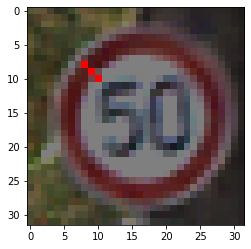

[[0.33725491 0.338411   0.21567759]
 [0.3842952  0.34104806 0.2244433 ]
 [0.39483473 0.32919014 0.23110706]
 [0.28224328 0.26095578 0.18291917]
 [0.19253924 0.18789101 0.12563844]
 [0.19467984 0.20789345 0.14133625]
 [0.25046557 0.28316289 0.18051031]
 [0.36824    0.34673163 0.22241859]
 [0.42881247 0.3258729  0.20142129]
 [0.35719526 0.3212522  0.19826984]]


In [50]:
print("Example of posioned sample")
plt.figure(figsize=(4,4))
plt.imshow(x_poisoned_train[indices_poisoned][44].reshape((32,32,3)))
plt.show()

print(x_poisoned_train[indices_poisoned][44][0][:10])

Example of posioned sample


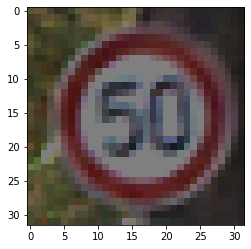

[[0.33725491 0.338411   0.21567759]
 [0.3842952  0.34104806 0.2244433 ]
 [0.39483473 0.32919014 0.23110706]
 [0.28224328 0.26095578 0.18291917]
 [0.19253924 0.18789101 0.12563844]
 [0.19467984 0.20789345 0.14133625]
 [0.25046557 0.28316289 0.18051031]
 [0.36824    0.34673163 0.22241859]
 [0.42881247 0.3258729  0.20142129]
 [0.35719526 0.3212522  0.19826984]]


In [44]:
print("Example of posioned sample")
plt.figure(figsize=(4,4))
plt.imshow(final_advs[44].reshape((32,32,3)))
plt.show()

print(final_advs[44][0][:10])

In [52]:
pred_adv = model2.predict(final_advs)
pred_adv_labels = [np.argmax(x) for x in pred_adv]

pred_poison = model2.predict(x_poisoned_train[indices_poisoned])
pred_poison_labels = [np.argmax(x) for x in pred_poison]

pred_original = model2.predict(X_train[indices_poisoned])
pred_original_labels = [np.argmax(x) for x in pred_original]

In [53]:
print("Model 2 predict ", len([x for x in pred_adv_labels if x==2]),"/",final_advs.shape[0],"adversarial samples as label",target_class)

Model 2 predict  937 / 938 adversarial samples as label 2


In [54]:
print("Model 2 predict ", len([x for x in pred_poison_labels if x==2]),"/",final_advs.shape[0],"poisoned samples as label",target_class)

Model 2 predict  937 / 938 poisoned samples as label 2


In [55]:
print("Model 2 predict ", len([x for x in pred_original_labels if x==2]),"/",final_advs.shape[0],"original samples as label",target_class)

Model 2 predict  913 / 938 original samples as label 2


In [48]:
def poison_dataset_clean_label_no_ART(x_clean, y_clean, x_poisoned, indices, x_pos, y_pos):
    '''
    Function to poison a dataset

    x_clean: vector of features of samples of the clean dataset
    y_clean: vector of labels of samples of the clean dataset
    x_pos: images among x_clean that have to be poisoned and added to x_clean
    y_pos: labels of x_pos
    indices: indices of x_pos among x_clean vector
    poison_func: inser_image function to insert the trigger in the image
    '''
    x_poison = np.copy(x_clean)
    is_poison = np.zeros(np.shape(y_clean)[0])

    poison_images=x_poisoned
    for i in range(indices.shape[0]):
        #set pixel "x_pos","y_pos" to red
        poison_images[i][x_pos][y_pos][0]=1
        poison_images[i][x_pos][y_pos][1]=0
        poison_images[i][x_pos][y_pos][2]=0
        
        #set pixel "x_pos+1","y_pos+1" to red
        poison_images[i][x_pos+1][y_pos+1][0]=1
        poison_images[i][x_pos+1][y_pos+1][1]=0
        poison_images[i][x_pos+1][y_pos+1][2]=0
        
        #set pixel "x_pos+2","y_pos+2" to red
        poison_images[i][x_pos+2][y_pos+2][0]=1
        poison_images[i][x_pos+2][y_pos+2][1]=0
        poison_images[i][x_pos+2][y_pos+2][2]=0
    
    x_poison[indices]=poison_images
    is_poison[indices]=1

    is_poison = is_poison != 0

    return is_poison, x_poison

In [104]:
print("\n\nAttacking with position x:",x_pos," y:",y_pos,"and PP_POISON:",PP_POISON,"\n\n")
print("Poisoning training dataset...")

#poison dataset with backdoor trigger image
(is_poison_train,x_poisoned_train)=poison_dataset_clean_label_no_ART(X_train,y_train,final_advs,indices_poisoned,x_pos,y_pos)

print("Training dataset poisoned")



Attacking with position x: 8  y: 8 and PP_POISON: 0.6 


Poisoning training dataset...
Training dataset poisoned
